In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import enchant

import pickle
from sklearn.neighbors import NearestNeighbors

In [3]:
import glob, os, sys
import numpy as np

In [4]:
from Code.text_model_pdfepub import TextModel

D:\DesignAPP\anaconda3\envs\demoEnvpy38\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
NOVEL_DIR='books1/'
NOVEL_FILES = []
NOVEL_FILES.extend(glob.glob(os.path.join(NOVEL_DIR, '*')))

In [6]:
novel_model = TextModel(NOVEL_FILES, min_df=3)

D:\DesignAPP\anaconda3\envs\demoEnvpy38\lib\site-packages\ebooklib\epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')


In [7]:
novel_model.search('Chivalry is not dead it is just not always wearing armor.', n=10)

[{'paragraph': ' Dana Oliver (2014), for example, echoed a larger popular opinion that “Chivalry isn’t dead” (para. 1). The suggestion being that chivalry is something that had a favorable understanding, as suggested in the 2010 Harris Poll in which Harper (2010) reported the generally favorable perception of “chivalry” among the majority of the survey sample.',
  'nr': 1284,
  'ID': 'Social Aesthetics and the School Environment A Case Study of the Chivalric Ethos (Adam I. Attwood (auth.)) (Z-Library)',
  'type': 'epub'},
 {'paragraph': 'matthew woodcock286 often as to suggest that it became a topos .20 Chivalry continually warred against its own ‘distorted image’ , although such struggles need not always be destructive or counter-productive.',
  'nr': 2884,
  'ID': 'A Companion to Chivalry (Robert W. Jones (editor), Peter Coss (editor)) (Z-Library)',
  'type': 'pdf'},
 {'paragraph': ' This parallels the basis of perception category in which informants who indicated that they thought o

In [8]:
novel_model.get_key_words(novel_model.vectorize('Chivalry love romatic'), n=10)

['knighthood',
 'opinion',
 'ideal',
 'concept',
 'chivalry',
 'love',
 'code',
 'keen',
 'courtly',
 'rethinking']

In [9]:
print(novel_model.paragraphs[1282])
print(len(novel_model.paragraphs))

{'paragraph': ' Lowney, A Vanished World: Muslims, Christians, and Jews in Medieval Spain (Oxford, 2005); and T . Devaney, Enemies in the Plaza: Urban Spec - tacle and the End of Spanish Frontier Culture, 1460–1492 (Philadelphia, 2015).', 'nr': 1283, 'ID': 'A Companion to Chivalry (Robert W. Jones (editor), Peter Coss (editor)) (Z-Library)', 'type': 'pdf'}
279051


# SOM

In [10]:
import Code.SOM as SOMlib
import matplotlib.pyplot as plt

D:\DesignAPP\anaconda3\envs\demoEnvpy38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 6000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = novel_model.vector_matrix

# Normalised Training Data
n_train_data = SOMlib.normalise(train_data, train_data)

# Initialize the SOM randomly
som = rand.uniform(-0.5, 0.5, (m, n, len(train_data[0])))

0


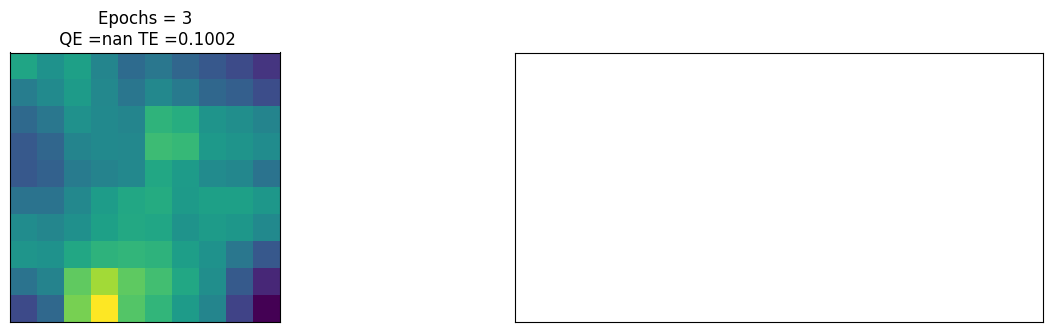

In [64]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(15, 3.5),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
soms = []
for epochs, i in zip([3], range(1)):
    print(i)
    total_epochs += epochs
    som = SOMlib.train_SOM(som, train_data, learn_rate = .01, radius_sq = 3, epochs = epochs)
    soms.append(som)
    QE = round(SOMlib.calculateQE(som, train_data), 4)
    TE = round(SOMlib.calculateTE(som, train_data), 4)

    ax[i].imshow(SOMlib.u_matrix(som))
    ax[i].title.set_text('Epochs = ' + str(total_epochs) + '\n QE =' + str(QE) + ' TE =' + str(TE))

In [34]:
sentences = 'Chivalry is not dead it is just not always wearing armor'

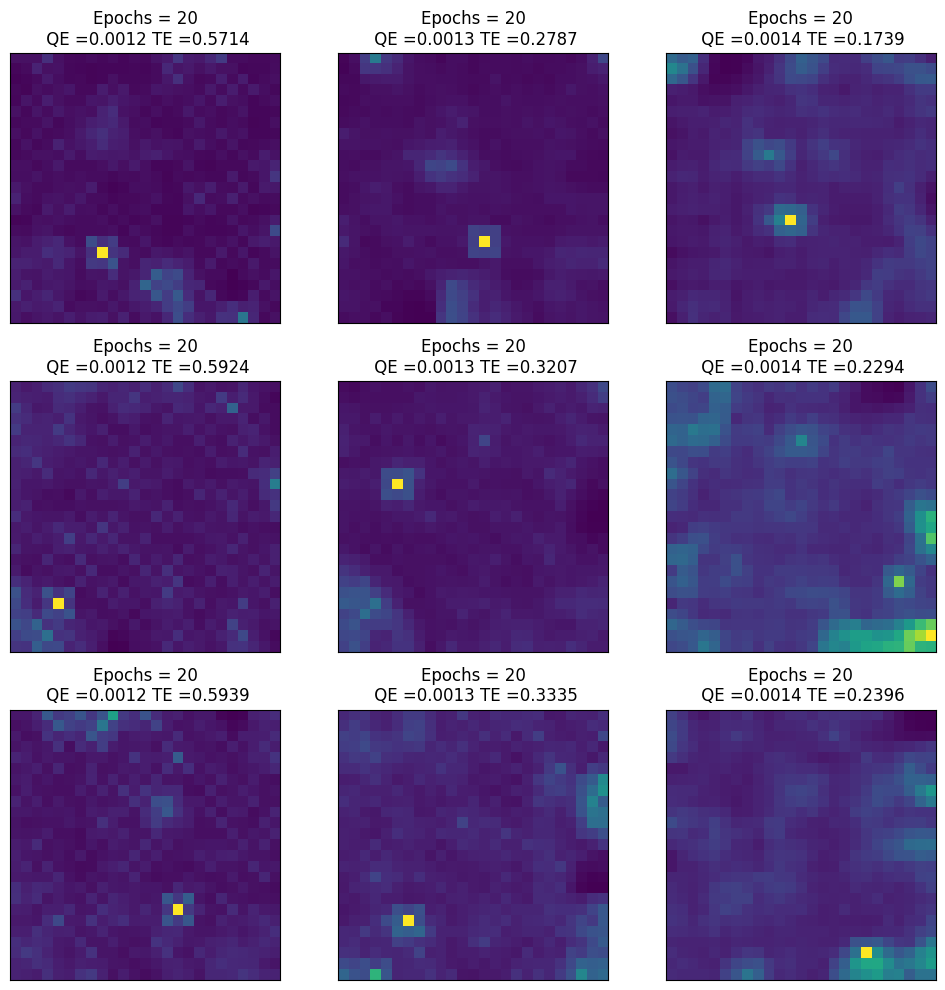

In [12]:
# Dimensions of the SOM grid
m = 25
n = 25
# Number of training examples
n_x = 10000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = novel_model.vector_matrix

# Normalised Training Data
n_train_data = SOMlib.normalise(train_data, train_data)

# 定义学习率和半径的值列表
learn_rates = [0.1, 0.3, 0.5]
radiuses = [1, 3, 5]

# Initialize the SOM randomly
fig, axes = plt.subplots(
    nrows=len(learn_rates), ncols=len(radiuses), figsize=(10, 10),
    subplot_kw=dict(xticks=[], yticks=[]))
soms = []

for i, learn_rate in enumerate(learn_rates):
    for j, radius_sq in enumerate(radiuses):
        total_epochs = 20 
        som = rand.uniform(-0.5, 0.5, (m, n, len(train_data[0])))
        som = SOMlib.train_SOM(som, n_train_data, learn_rate=learn_rate, radius_sq=radius_sq, epochs=total_epochs)
        soms.append(som)
        QE = round(SOMlib.calculateQE(som, n_train_data), 4)
        TE = round(SOMlib.calculateTE(som, n_train_data), 4)

        axes[i, j].imshow(SOMlib.u_matrix(som))
        axes[i, j].title.set_text('Epochs = ' + str(total_epochs) + '\n QE =' + str(QE) + ' TE =' + str(TE))

plt.tight_layout()
plt.show()


In [13]:
import pickle

def save_soms(soms, filename):
    with open(filename, 'wb') as f:
        pickle.dump(soms, f)

def load_soms(filename):
    with open(filename, 'rb') as f:
        soms = pickle.load(f)
    return soms

In [14]:
save_soms(soms, 'soms.pkl')

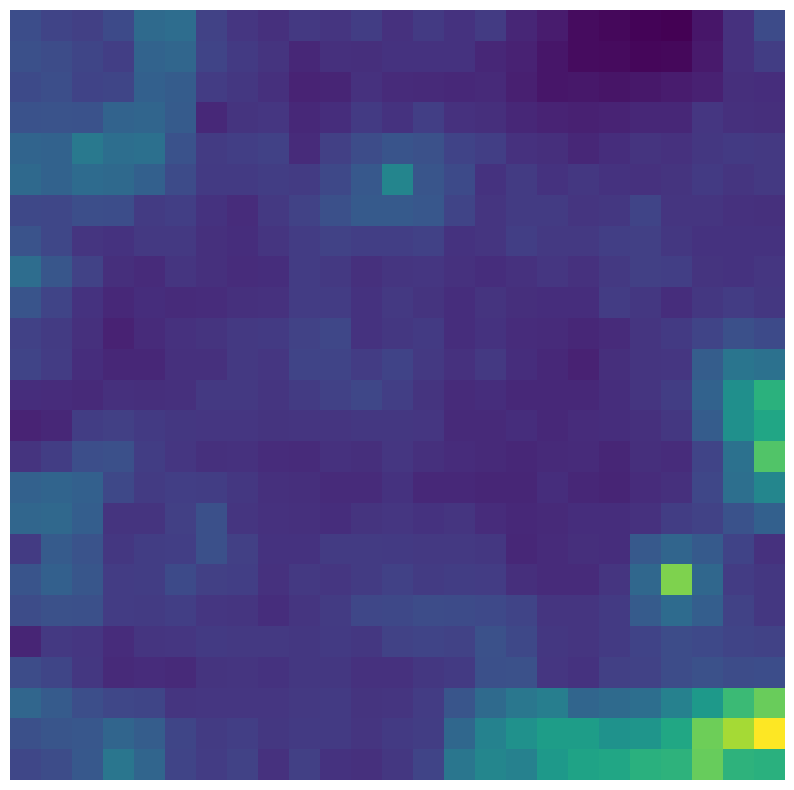

In [32]:
SOM = soms[5]

from matplotlib import cm
u_matrix_values = SOMlib.u_matrix(SOM)


plt.figure(figsize=(10, 10))
cmap = cm.viridis
im = plt.imshow(u_matrix_values, cmap=cmap, aspect='auto')


plt.axis('off')
#plt.savefig('som_image.png')
plt.show()

In [67]:
# Create an empty dictionary for neuron-word mapping
neuron_word_mapping = {}

# Iterate over the SOM grid
for i in range(SOM.shape[0]):
    for j in range(SOM.shape[1]):
        # Initialize an empty list for each neuron
        neuron_word_mapping[(i, j)] = []

# Iterate over the paragraphs and their vectors
for word, vector in zip(novel_model.paragraphs, n_train_data):
    # Find the best matching unit (BMU) for the vector
    best_matching_unit = SOMlib.find_BMU(SOM, vector)
    # Append the word to the list corresponding to the BMU in the neuron-word mapping dictionary
    neuron_word_mapping[best_matching_unit].append(word)

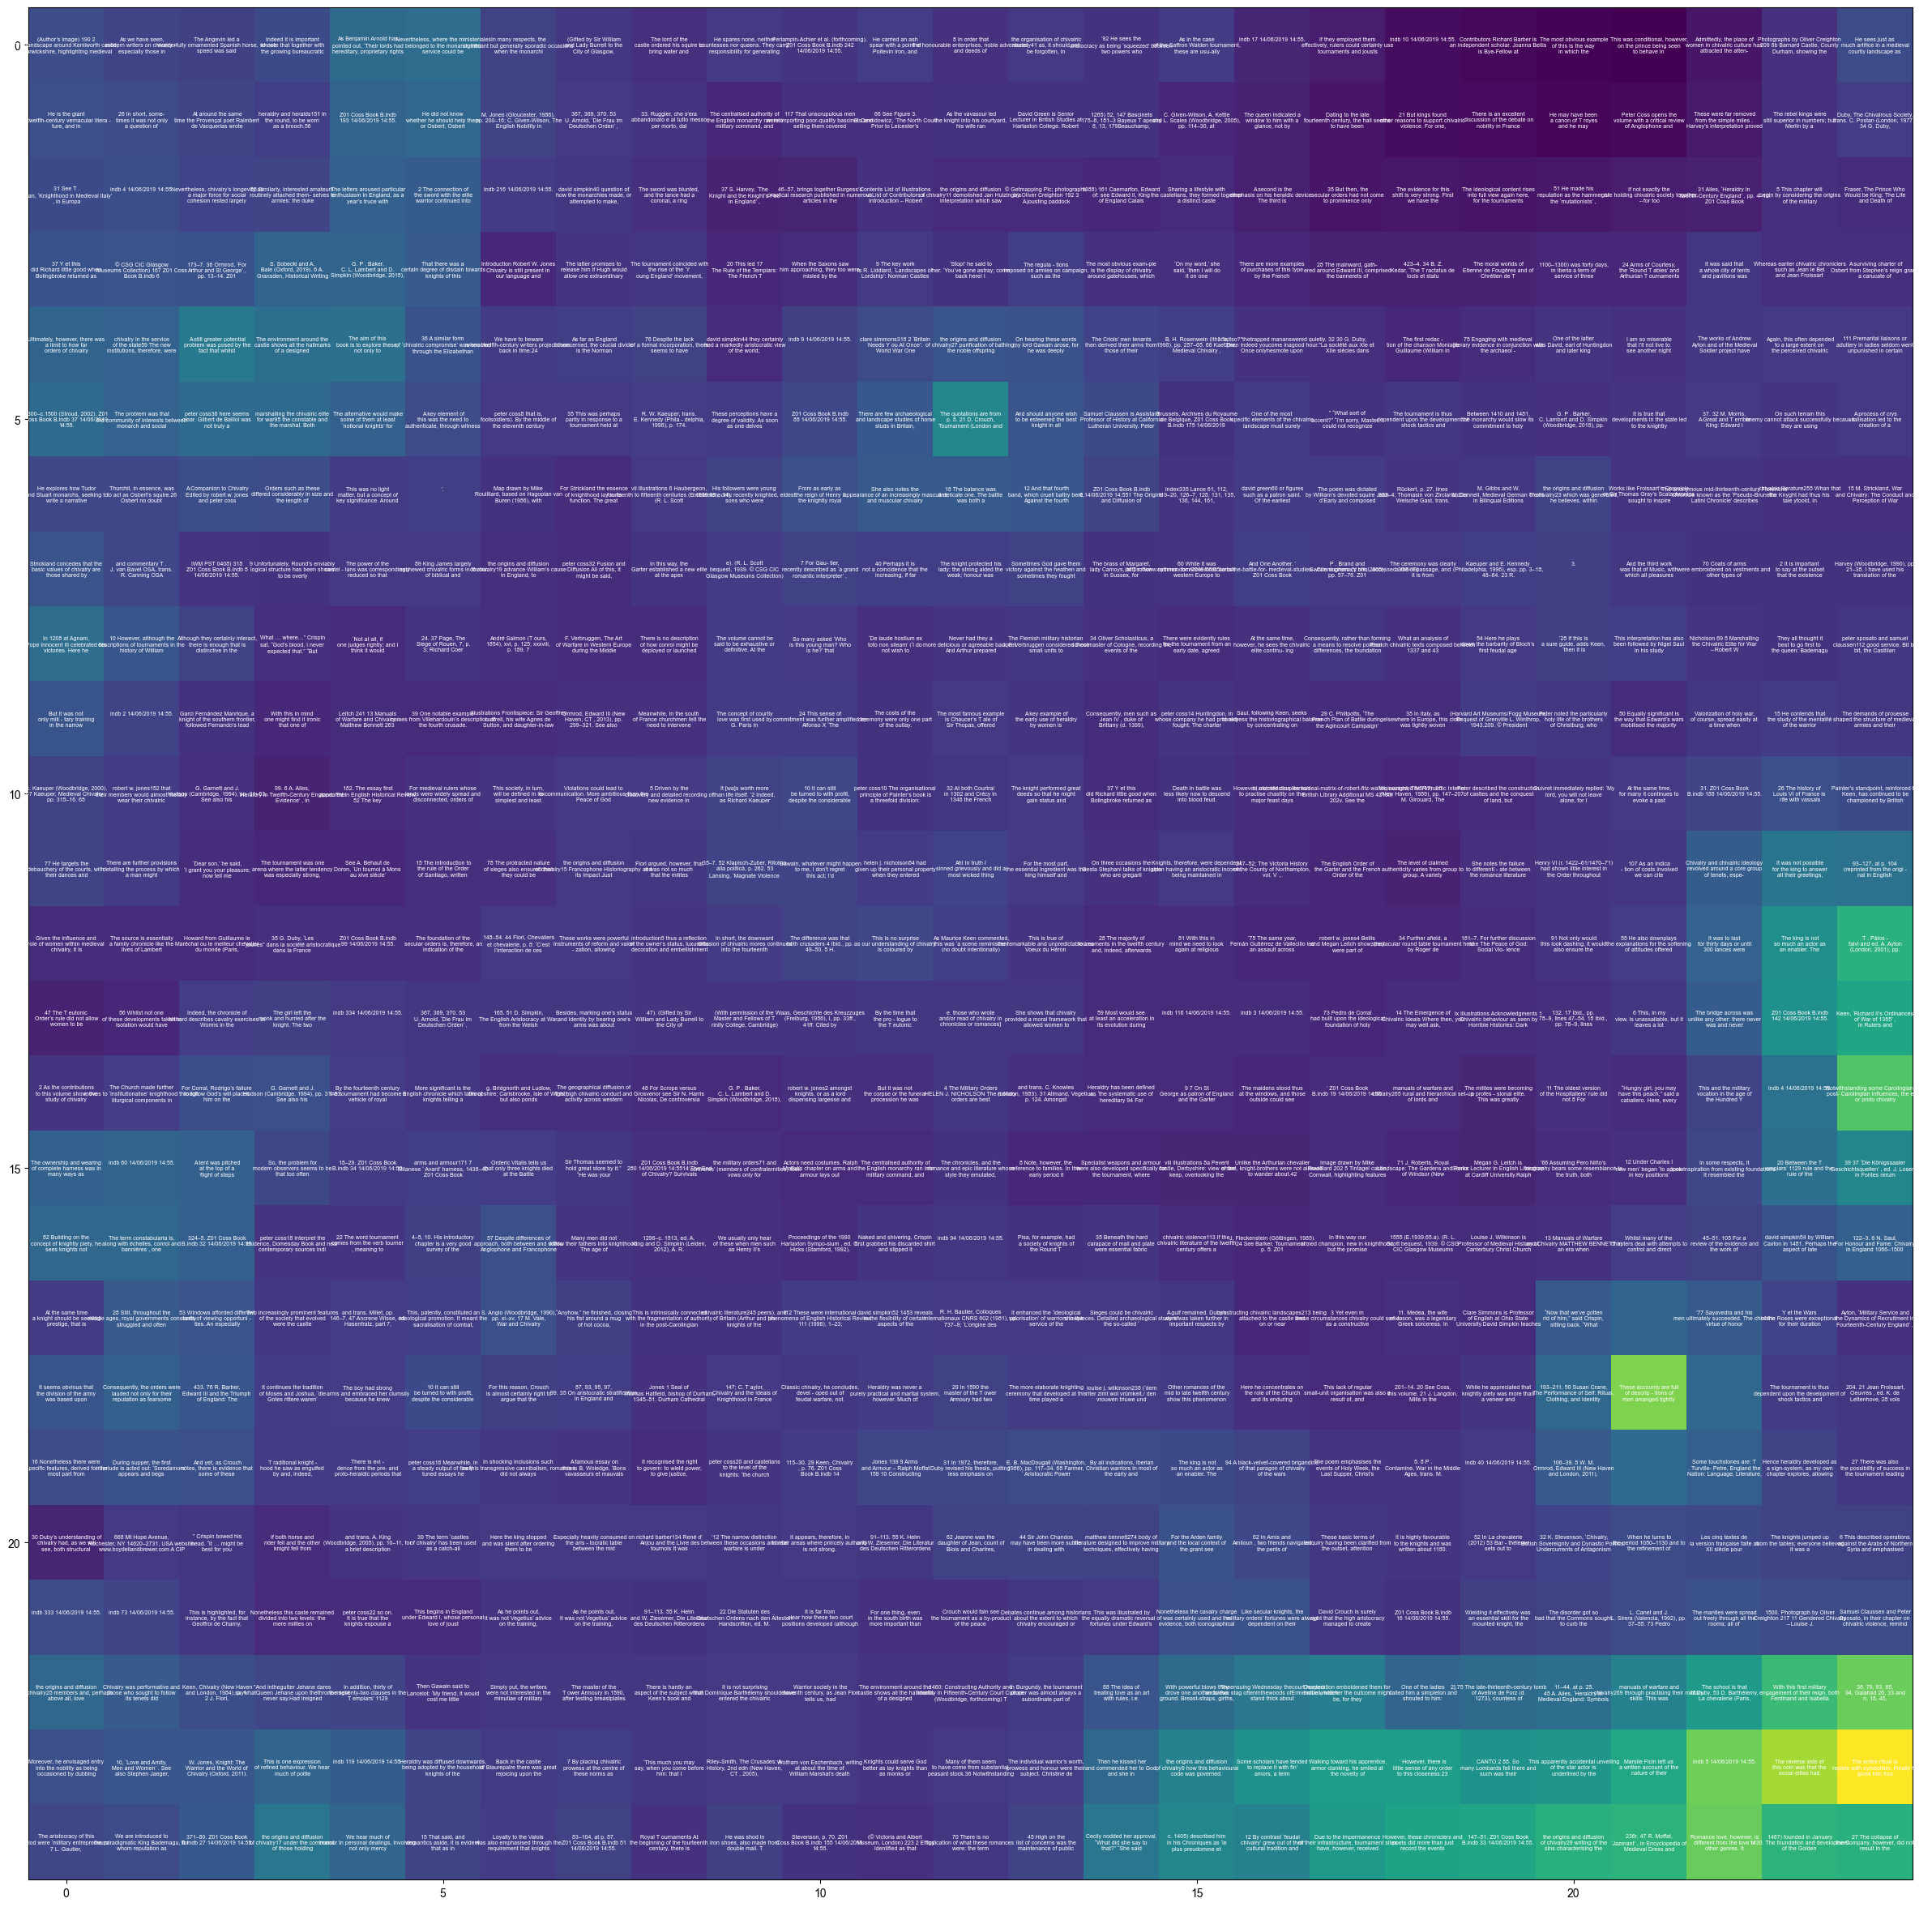

In [80]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'  # 设置字体为Arial

# Visualize the SOM with word labels
fig, ax = plt.subplots(figsize=(30, 30))

# 显示U矩阵
im = ax.imshow(u_matrix_values, cmap=cmap, aspect='auto')

# 遍历神经元单元映射字典
for (i, j), words_list in neuron_word_mapping.items():
    # 确保单词列表不为空
    if words_list:
        # 获取单元的第一个匹配项的前10个单词，并分成三行显示
        truncated_text = " ".join(words_list[0]["paragraph"].split()[:4]) + "\n" + \
                        " ".join(words_list[0]["paragraph"].split()[4:9]) + "\n" + \
                        " ".join(words_list[0]["paragraph"].split()[9:12])
        # 在单元位置上显示文本，将文本颜色改为白色
        ax.text(j, i, truncated_text, ha='center', va='center', color='white', fontsize=5novel_model.get_key_words(novel_model.vectorize('Chivalry love romatic'), n=10))


# 显示图像
plt.savefig('som_visualization.png', dpi=300)
plt.show()


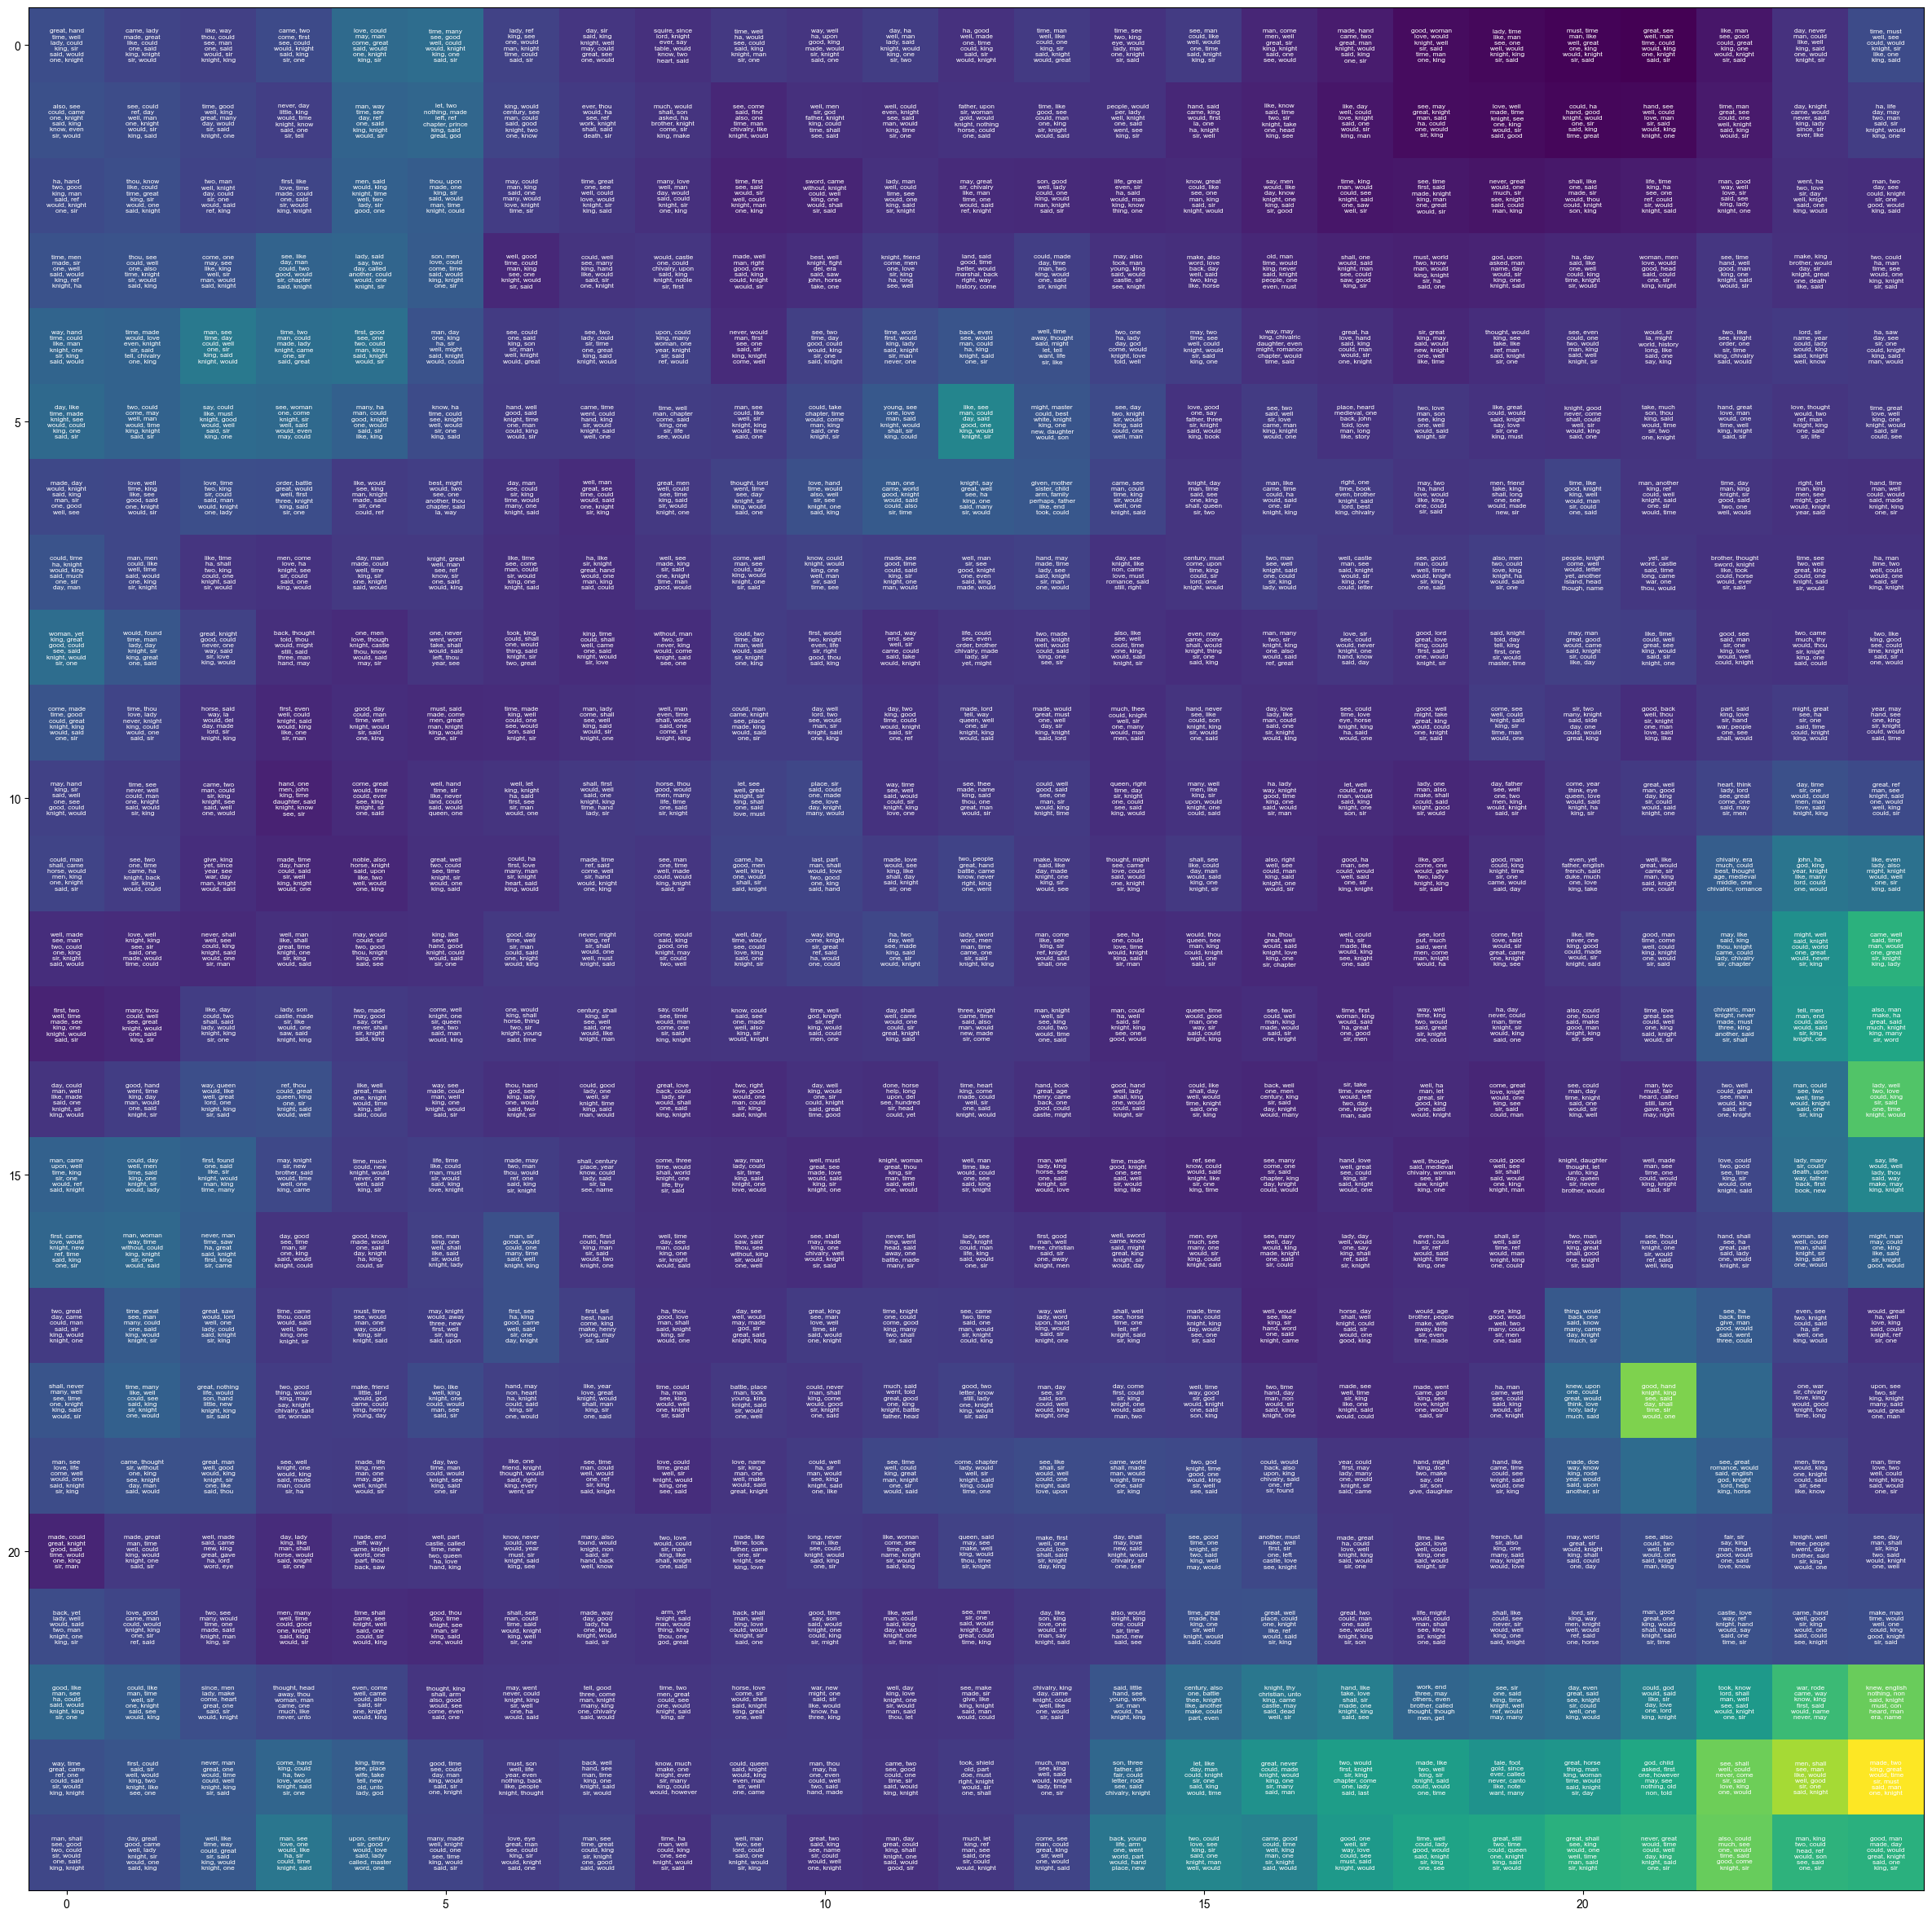

In [86]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'  # 设置字体为Arial

# Visualize the SOM with word labels
fig, ax = plt.subplots(figsize=(30, 30))

# 显示U矩阵
im = ax.imshow(u_matrix_values, cmap=cmap, aspect='auto')

# 遍历神经元单元映射字典
for (i, j), words_list in neuron_word_mapping.items():
    # 确保单词列表不为空
    if words_list:
        # 获取单元的所有段落文本
        paragraphs = [word["paragraph"] for word in words_list]
        # 将所有段落文本合并为一个字符串
        combined_text = ' '.join(paragraphs)
        # 使用novel_model.get_key_words()函数提取关键词
        keywords = novel_model.get_key_words(novel_model.vectorize(combined_text), n=12)
        # 将关键词分成两个一行
        num_words = len(keywords)
        if num_words > 0:
            line1 = ', '.join(keywords[:2])
        else:
            line1 = ''
        if num_words > 2:
            line2 = ', '.join(keywords[2:4])
        else:
            line2 = ''
        if num_words > 4:
            line3 = ', '.join(keywords[4:6])
        else:
            line3 = ''
        if num_words > 6:
            line4 = ', '.join(keywords[6:8])
        else:
            line4 = ''
        if num_words > 8:
            line5 = ', '.join(keywords[8:10])
        else:
            line5 = ''
        if num_words > 10:
            line6 = ', '.join(keywords[10:])
        else:
            line6 = ''
        # 在单元位置上显示关键词，将文本颜色改为白色，字号设置为6
        ax.text(j, i, f"{line1}\n{line2}\n{line3}\n{line4}\n{line5}\n{line6}", ha='center', va='center', color='white', fontsize=6)


# 显示图像
plt.savefig('som_keywords.png', dpi=300)
plt.show()


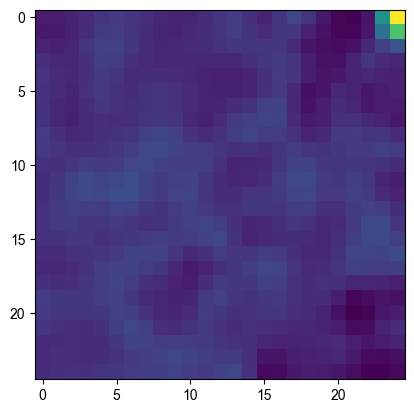

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# 句子
sentences = "Chivalry is not dead, just not always in armor. Things are spiraling upward, andalthough we cannot step into the same river twice, the river still moves forward"

# 向量化句子
vectorized_sentence = novel_model.vectorize(sentences)
vectorized_sentence = np.squeeze(vectorized_sentence)  # 去除多余的维度，使其成为二维数组

# 使用向量化的句子激活SOM
activated_SOM = SOMlib.activate(SOM, vectorized_sentence)

# 可视化激活结果
plt.imshow(activated_SOM, cmap='viridis', interpolation='none')
plt.show()


In [95]:
novel_model.get_key_words([SOM[0][24]])

['note',
 'make',
 'castle',
 'canto',
 'help',
 'heard',
 'three',
 'therefore',
 'thus',
 'unto']

In [100]:
SOMcontents = []
for i in range(len(SOM)):
    row = []
    for j in range(len(SOM[0])):
        row.append([])
    SOMcontents.append(row)

for f, fi in zip(train_data, novel_model.paragraphs):
    g,h = SOMlib.find_BMU(SOM, f)
    SOMcontents[g][h].append(fi)

In [101]:
for r in SOMcontents:
    print([len(c) for c in r])

[26749, 42, 5, 801, 452, 134, 1980, 11, 0, 647, 31, 1500, 81, 1447, 54, 1258, 14, 378, 4, 0, 0, 0, 0, 0, 4366]
[1098, 2, 0, 2, 25, 0, 0, 0, 0, 2, 0, 10, 0, 0, 0, 0, 6, 6, 0, 20, 0, 0, 0, 0, 0]
[1653, 11, 8, 1, 21, 0, 0, 0, 0, 662, 14, 587, 24, 2, 6, 474, 8, 37, 218, 0, 2, 0, 0, 0, 5]
[2912, 50, 7, 2, 7, 38, 9554, 0, 0, 0, 0, 0, 0, 566, 0, 0, 0, 34, 19, 0, 246, 2, 936, 89, 3008]
[331, 10, 962, 16, 24, 16, 357, 4, 0, 0, 245, 0, 0, 0, 0, 271, 0, 1187, 123, 238, 868, 17, 110, 4, 125]
[2506, 14, 9, 4, 2243, 4, 20, 29, 349, 3548, 4, 0, 2251, 5, 1658, 13, 572, 6, 1042, 244, 171, 85, 1062, 70, 1421]
[9803, 0, 0, 1, 8, 0, 77, 2250, 175, 0, 14, 17, 0, 0, 5, 19, 513, 0, 34, 14, 1291, 36, 52, 0, 150]
[3, 0, 2, 6, 826, 0, 0, 5, 238, 0, 12, 1562, 7, 0, 13, 6, 1118, 32, 2422, 0, 0, 0, 0, 0, 2334]
[6, 0, 11, 0, 39, 0, 0, 10, 195, 2758, 0, 4, 0, 885, 691, 14, 2, 0, 12, 0, 0, 1951, 0, 0, 46]
[7924, 0, 0, 11, 1366, 2, 8, 1341, 357, 20, 0, 41, 0, 56, 40, 1644, 10, 29, 4, 832, 10, 43, 0, 0, 147]
[21, 0, 0,

In [102]:
SOMcontents[0][24][:10]

[{'paragraph': 'indb 4 14/06/2019 14:55.',
  'nr': 84,
  'ID': 'A Companion to Chivalry (Robert W. Jones (editor), Peter Coss (editor)) (Z-Library)',
  'type': 'pdf'},
 {'paragraph': '10 It can still be turned to with profit, despite the considerable increase in knowledge and shifts in understanding that have taken place in myriad areas during the intervening years. For Painter chivalry simply ‘denotes the ideals and practices considered suitable for a noble’ .',
  'nr': 124,
  'ID': 'A Companion to Chivalry (Robert W. Jones (editor), Peter Coss (editor)) (Z-Library)',
  'type': 'pdf'},
 {'paragraph': ' For Strickland the essence of knighthood lay in its function. The great lords adopted the style miles not as an expression of rank or wealth but because they themselves participated in a shared function as elite mounted warriors.',
  'nr': 148,
  'ID': 'A Companion to Chivalry (Robert W. Jones (editor), Peter Coss (editor)) (Z-Library)',
  'type': 'pdf'},
 {'paragraph': ' The high-water